# Bank Marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Description of Data:

# Bank client data:
Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')


# Details regarding last contact of the current campaign:
Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric).

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# Economic Index attributes

Emp.var.rate: employment variation rate  (numeric)

Cons.price.idx: consumer price index  (numeric)

Cons.conf.idx: consumer confidence index (numeric)

Euribor3m: euribor 3 month rate (numeric)

Nr.employed: number of employees (numeric)


# Output variable (desired target):
y - has the client subscribed to the term deposit? (binary: 'yes', 'no')


In [1]:
#importing the necessary libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE


#Algorithms

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import graphviz 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import graphviz
import pydot

#Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#import xgboost as xgb
#from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# checking the shape of the dataframe

bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# Bivarite Analysis

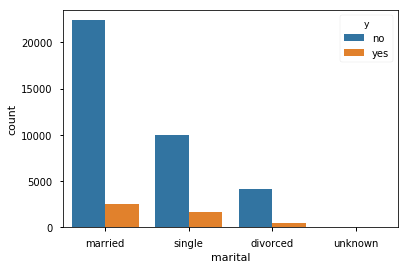

In [73]:
sns.countplot(x='marital',hue='y',data=bank_df)

Text(0.5,1,'Duration V.S. Term Deposit')

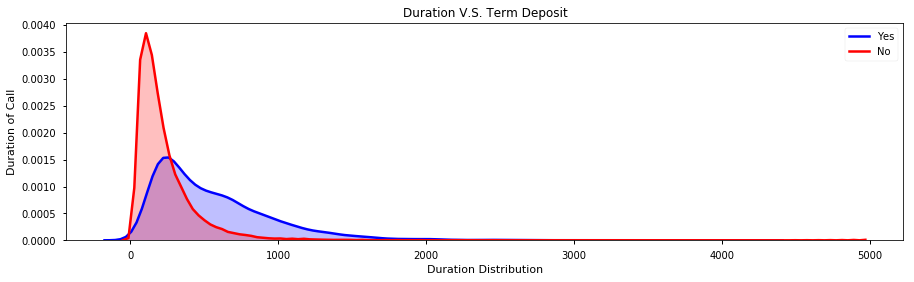

In [74]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(bank_df.loc[(bank_df['y'] == 'yes'),'duration'] , color='b',shade=True,label='Yes')
ax=sns.kdeplot(bank_df.loc[(bank_df['y'] == 'no'),'duration'] , color='r',shade=True, label='No')
ax.set(xlabel='Duration Distribution', ylabel='Duration of Call')
plt.title('Duration V.S. Term Deposit')


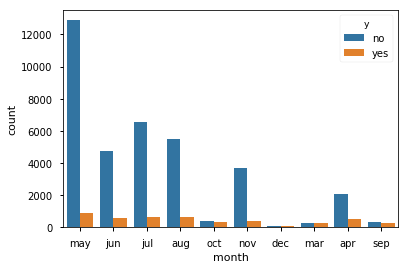

In [76]:
sns.countplot(x='month',hue='y',data=bank_df)

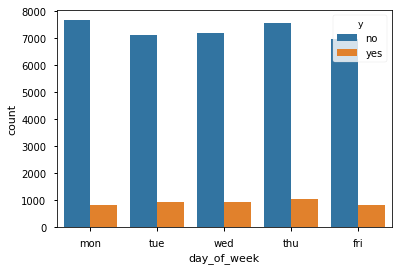

In [77]:
sns.countplot(x='day_of_week',hue='y',data=bank_df)

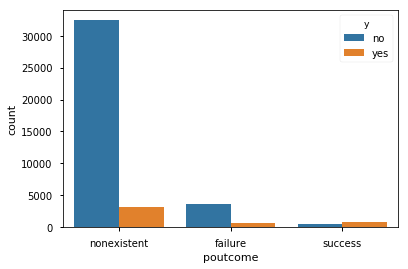

In [78]:
sns.countplot(x='poutcome',hue='y',data=bank_df)

# We decided to seperate the data into 3 parts
   - Client specific
   - Marketing specific
   - Economic index specific

# Client specific data processing

In [5]:
client_df = bank_df.iloc[: , 0:7]
client_df.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


# Checking the spread of each categorical columns

# Univarite Analysis

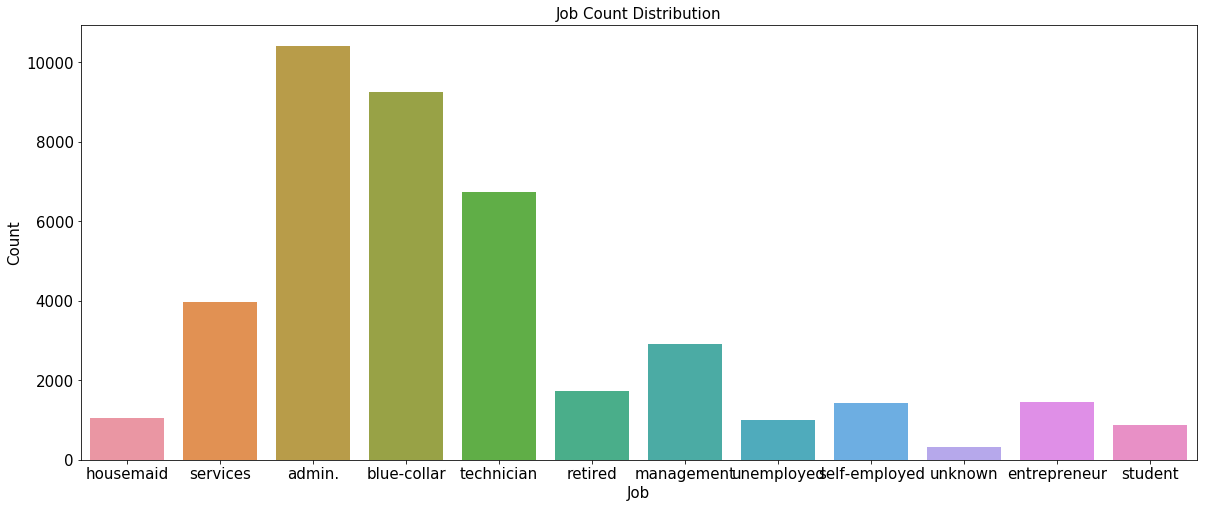

In [6]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = client_df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


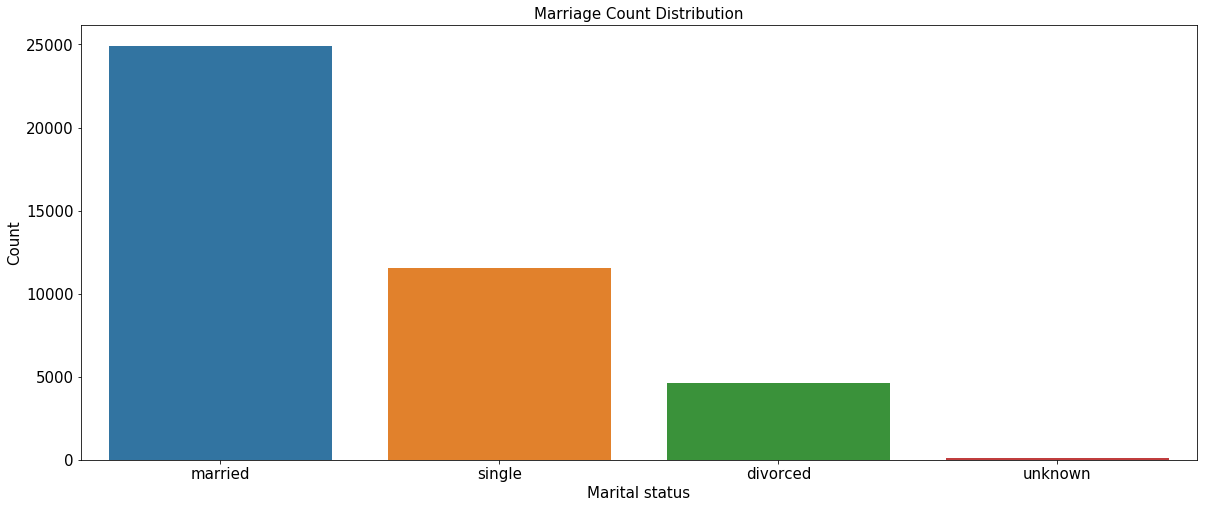

In [7]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = client_df)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marriage Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


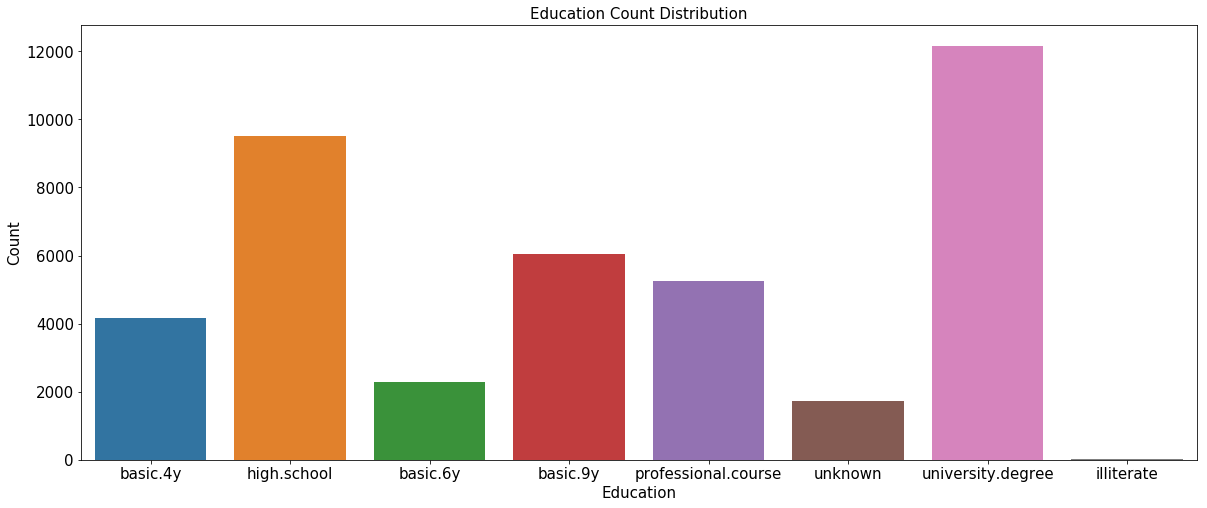

In [8]:

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = client_df)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


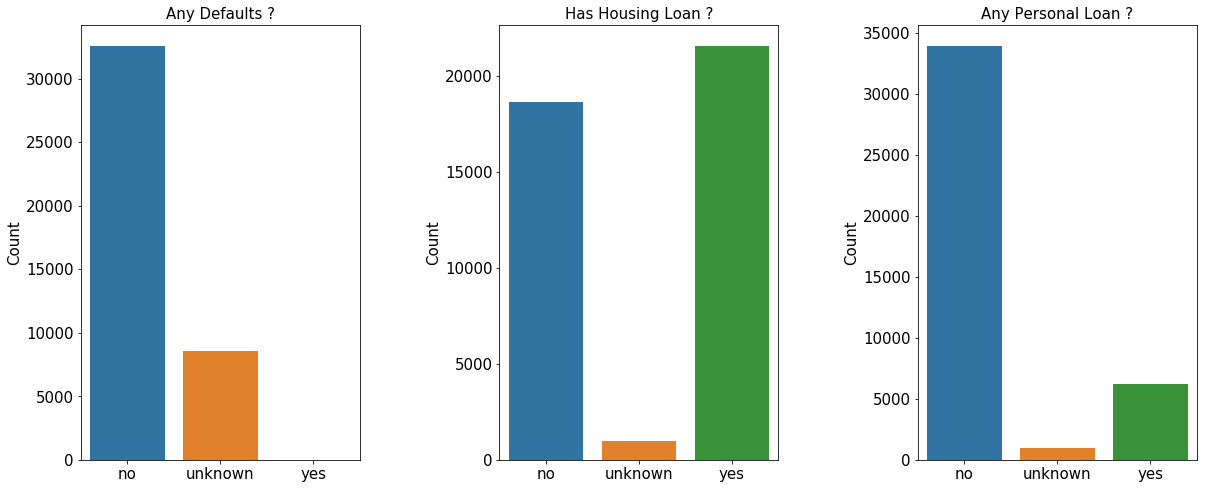

In [9]:
# Is credit in default ?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = client_df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Any Defaults ?', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Has housing loan ?
sns.countplot(x = 'housing', data = client_df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Has Housing Loan ?', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Has Personal loan ?
sns.countplot(x = 'loan', data = client_df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Any Personal Loan ?', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)


# Checking the distribution of Age

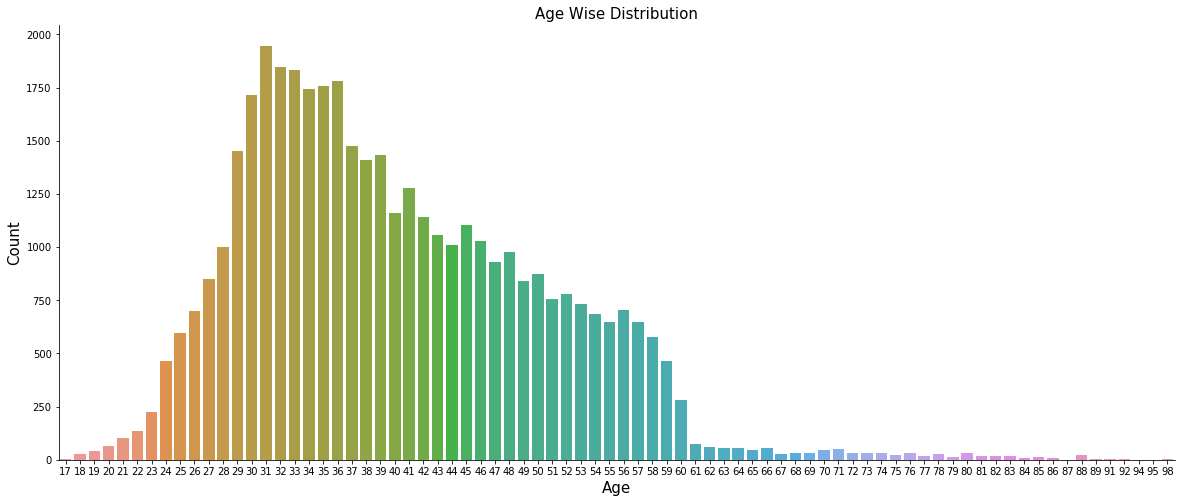

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Wise Distribution', fontsize=15)
sns.despine()


# Checking the outliers in Age

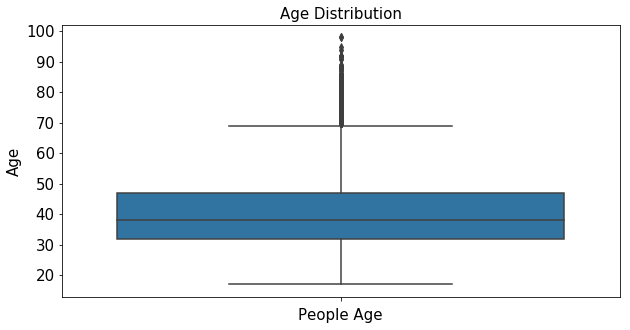

In [11]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'age', data = client_df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


In [12]:
# Calculate the outliers using:

  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
 

In [13]:
Q1=client_df['age'].quantile(q = 0.25)
Q2=client_df['age'].quantile(q = 0.50)
Q3=client_df['age'].quantile(q = 0.75)
Q4=client_df['age'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Ages above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Ages below: ', Q1 - 1.5*(IQR), 'are outliers')



1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
IQR:  15.0
Ages above:  69.5 are outliers
Ages below:  9.5 are outliers


In [14]:
# checking other details of age
client_df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

# Age data has quite dispersion , we will divide it into buckets

In [15]:
# functions to create bucketing in age

def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age']=4
           
    return df

age(client_df);

# Checking the categorical data

In [16]:
# converting categorical columns to numerical values
"""
client_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)


client_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

client_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

client_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
"""


"\nclient_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)\n\n\nclient_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)\n\nclient_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)\n\nclient_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n"

# One hot encoding for all categorical values

In [17]:
client_df=pd.get_dummies(client_df)
client_df.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,3,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,3,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


# Marketing Data Analysis

In [18]:
# Creating seperate datasets for marketing related data
marketing_df = bank_df.iloc[: , 7:15]
marketing_df.head()


,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent


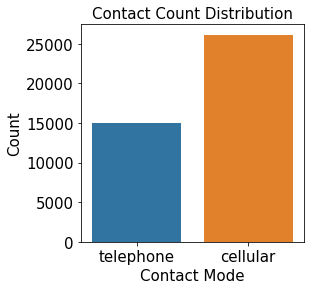

In [19]:

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
sns.countplot(x = 'contact', data = marketing_df)
ax.set_xlabel('Contact Mode', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


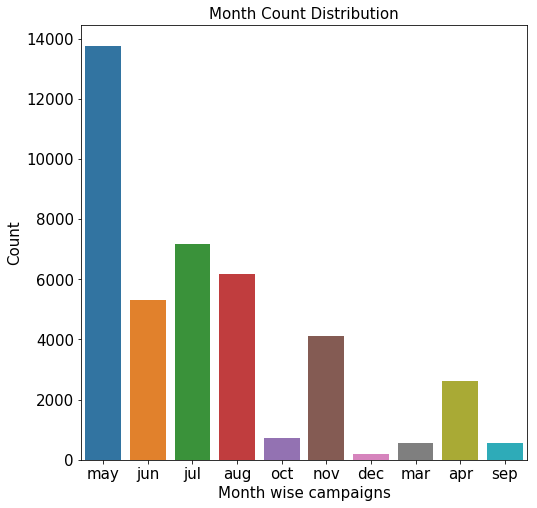

In [20]:

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'month', data = marketing_df)
ax.set_xlabel('Month wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Month Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


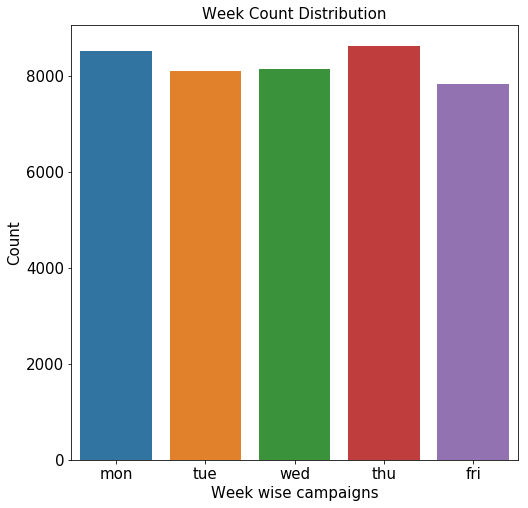

In [21]:

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'day_of_week', data = marketing_df)
ax.set_xlabel('Week wise campaigns', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Week Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)


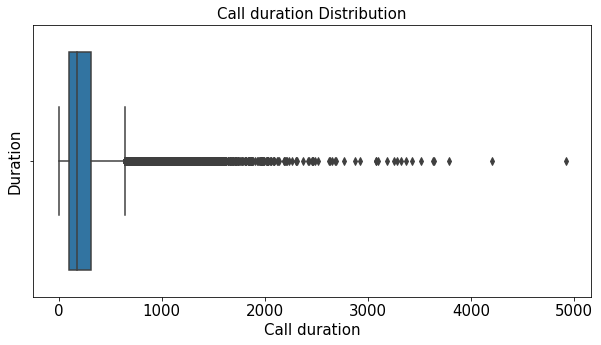

In [22]:
# checking the duration column

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
sns.boxplot(x = 'duration', data = marketing_df, orient = 'h', ax = ax1)
ax1.set_xlabel('Call duration', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Call duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


In [23]:
# finding the outliers

Q1=marketing_df['duration'].quantile(q = 0.25)
Q2=marketing_df['duration'].quantile(q = 0.50)
Q3=marketing_df['duration'].quantile(q = 0.75)
Q4=marketing_df['duration'].quantile(q = 1.00)                        

IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


print('Duration above: ', Q3 + 1.5*(IQR), 'are outliers')
print('Duration below: ', Q1 - 1.5*(IQR), 'are outliers')



1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
IQR:  217.0
Duration above:  644.5 are outliers
Duration below:  -223.5 are outliers


# Dividing the duration into buckets

In [24]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration']    = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration']   = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(marketing_df).head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,3,1,999,0,nonexistent
1,telephone,may,mon,2,1,999,0,nonexistent
2,telephone,may,mon,3,1,999,0,nonexistent
3,telephone,may,mon,2,1,999,0,nonexistent
4,telephone,may,mon,3,1,999,0,nonexistent


### Enconding - Month

In [25]:

d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

marketing_df.month=marketing_df.month.map(d_mons)


In [26]:
# converting datatype to int
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)

### Correlation - Marketing Data

In [27]:
corr=marketing_df.corr()
corr

,month,duration,campaign,pdays,previous
month,1.000000,-0.044550,-0.030635,-0.079556,0.063754
duration,-0.044550,1.000000,-0.116664,-0.075945,0.045537
campaign,-0.030635,-0.116664,1.000000,0.052584,-0.079141
pdays,-0.079556,-0.075945,0.052584,1.000000,-0.587514
previous,0.063754,0.045537,-0.079141,-0.587514,1.000000


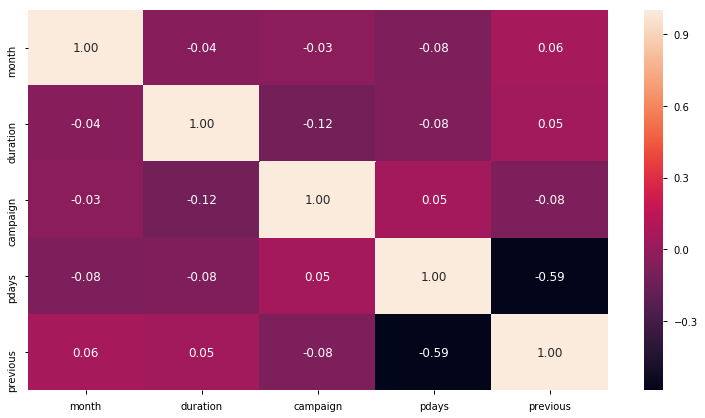

In [28]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

### OneHotEncoding

In [29]:
#marketing_df['contact']=pd.get_dummies(marketing_df['contact'])
#marketing_df['poutcome']=pd.get_dummies(marketing_df['poutcome'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
marketing_df['contact'] = le.fit_transform(marketing_df['contact'])
marketing_df['poutcome'] = le.fit_transform(marketing_df['poutcome'])

In [30]:
#marketing_df= marketing_df.loc[:, marketing_df.columns != 'day_of_week']
#marketing_df= marketing_df.loc[:, marketing_df.columns != 'previous']
d_week = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 
    'sat':6, 'sun':7}

marketing_df.day_of_week=marketing_df.day_of_week.map(d_week)

In [31]:
# converting datatype to int

marketing_df['contact'] =marketing_df['contact'].astype(str).astype(int)
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)
marketing_df['day_of_week'] =marketing_df['day_of_week'].astype(str).astype(int)
marketing_df['poutcome'] =marketing_df['poutcome'].astype(str).astype(int)

In [32]:
marketing_df.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,5,1,3,1,999,0,1
1,1,5,1,2,1,999,0,1
2,1,5,1,3,1,999,0,1
3,1,5,1,2,1,999,0,1
4,1,5,1,3,1,999,0,1


# Economic Index data

In [33]:
# Slicing market economic index data 
index_df = bank_df.iloc[: , 15:21]
index_df.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
idx_corr=index_df.corr()
idx_corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


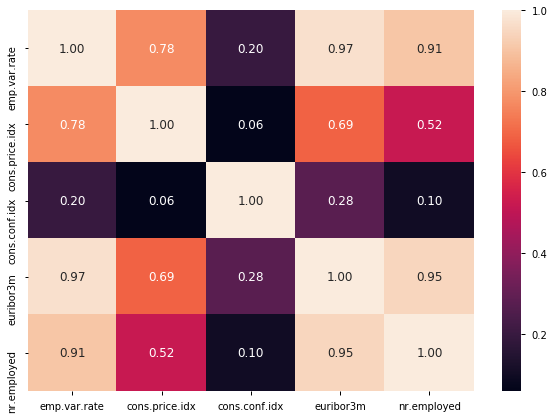

In [35]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(idx_corr, annot = True, fmt = ".2f")

###  High correlation 

euribor3m variable is highly correlated with 3 variables such as emp.var.rate, cons.price.idx & nr.employed variables so we can straight away remove these variables

In [36]:
index_df= index_df.loc[:, index_df.columns != 'emp.var.rate']
index_df= index_df.loc[:, index_df.columns != 'cons.price.idx']
index_df= index_df.loc[:, index_df.columns != 'nr.employed']

### Combining 3 dataframes

In [37]:
bank_final_df= pd.concat([client_df, marketing_df, index_df], axis = 1)
bank_final_df.shape

(41188, 45)

In [38]:
bank_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
age                              41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
job_unknown                      41188 non-null uint8
marital_divorced                 41188 non-null uint8
marital_married                  41188 non-null uint8
marital_single                   41188 non-null uint8
marital_unknown            

### Feature Importance

In [39]:
#from sklearn.model_selection import train_test_split
X = bank_final_df.loc[:, bank_final_df.columns != 'y']
Y = bank_final_df.loc[:, bank_final_df.columns == 'y']

In [40]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X, Y) 
## And score it on your testing data.
rf.score(X, Y)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [41]:
feature_importances.to_csv('feature_importance_4.csv')

### Based on the feature importance given by random forest, we have taken all the variable which gave more than 1% of imporantce

# Seperating X and Y

In [42]:
bank_final_df['y'].replace(['yes', 'no'],[1,0 ], inplace=True)

In [43]:
bank_final_df.columns

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [44]:
bank_final_df = bank_final_df[['y','duration',
'euribor3m',
'cons.conf.idx',
'campaign',
'day_of_week',
'month',
'age',
'previous',
'pdays',
'housing_yes',
'housing_no',
'contact',
'marital_married',
'job_admin.']]

In [45]:
X = bank_final_df.loc[:, bank_final_df.columns != 'y']
Y = bank_final_df.loc[:, bank_final_df.columns == 'y']

In [46]:
X.columns

Index(['duration', 'euribor3m', 'cons.conf.idx', 'campaign', 'day_of_week',
       'month', 'age', 'previous', 'pdays', 'housing_yes', 'housing_no',
       'contact', 'marital_married', 'job_admin.'],
      dtype='object')

# Splitting the data into Test and Train

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

# SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In [51]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [52]:
X=os_data_X
Y=os_data_y

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

# Model Selection

### Random Forest

In [100]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

cm_rf = confusion_matrix(y_test, y_pred)
print('lr_cm is ', lr_cm)
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


99.4 %
lr_cm is  [[7175  476]
 [ 317 7380]]
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



### Logistic Regression

In [101]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

cm_lr = confusion_matrix(y_test, y_pred)
print('lr_cm is ', lr_cm)
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


84.98 %
lr_cm is  [[7175  476]
 [ 317 7380]]
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



### Naive Bayes

In [102]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

cm_nv = confusion_matrix(y_test, y_pred)
print('lr_cm is ', lr_cm)
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

75.07 %
lr_cm is  [[7175  476]
 [ 317 7380]]
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM

In [103]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

cm_svm = confusion_matrix(y_test, y_pred)
print('lr_cm is ', lr_cm)
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

C:\Users\Mahesh.Sharma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


84.97 %
lr_cm is  [[7175  476]
 [ 317 7380]]
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



### Decision Tree

In [104]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

cm_dt = confusion_matrix(y_test, y_pred)
print('lr_cm is ', lr_cm)
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

99.4 %
lr_cm is  [[7175  476]
 [ 317 7380]]
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



In [93]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Logistic Regression', 
              'Random Forest', 
              'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, 
              acc_log, 
              acc_random_forest, 
              acc_gaussian, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.40,Random Forest
99.40,Decision Tree
84.98,Logistic Regression
84.97,Support Vector Machines
75.07,Naive Bayes


# Decision Tree

### Hyper Parameter Tuning

In [56]:
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth': np.arange(1, 10)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_tree.fit(X_train, y_train)

tree_preds = grid_tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

In [95]:
print(grid_tree.best_estimator_)
print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))
print('Best CV Score:')
print(grid_tree.best_score_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DecisionTree: Area under the ROC curve = 0.9685962651529136
Best CV Score:
0.9149678860653448


In [96]:
scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring = "accuracy")
print("Gini Scores:", scores)
print("Gini Mean:", scores.mean())
print("Gini Standard Deviation:", scores.std())

Gini Scores: [0.88916806 0.89949749 0.89388439 0.8950014  0.88857861 0.88494834
 0.89304664 0.89472214 0.88072626 0.88463687]
Gini Mean: 0.8904210192007407
Gini Standard Deviation: 0.005505542593192228


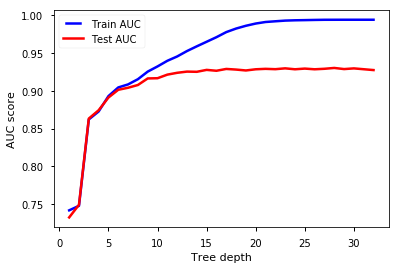

In [97]:
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [66]:
# Decision tree with entropy 
clf_gini =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


clf_gini.fit(X, Y) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
# Predicton on test with entropy 
y_pred_gini = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred_gini) 

Predicted values:
[1 1 1 ... 0 0 1]


In [68]:
print("Confusion Matrix Entropy: ", confusion_matrix(y_test, y_pred_gini)) 
print ("Accuracy Entropy: ", accuracy_score(y_test,y_pred_gini)*100) 
print("Report Entropy: ", classification_report(y_test, y_pred_gini))

Confusion Matrix Entropy:  [[6831  820]
 [ 910 6787]]
Accuracy Entropy:  88.72817305186344
Report Entropy:               precision    recall  f1-score   support

          0       0.88      0.89      0.89      7651
          1       0.89      0.88      0.89      7697

avg / total       0.89      0.89      0.89     15348



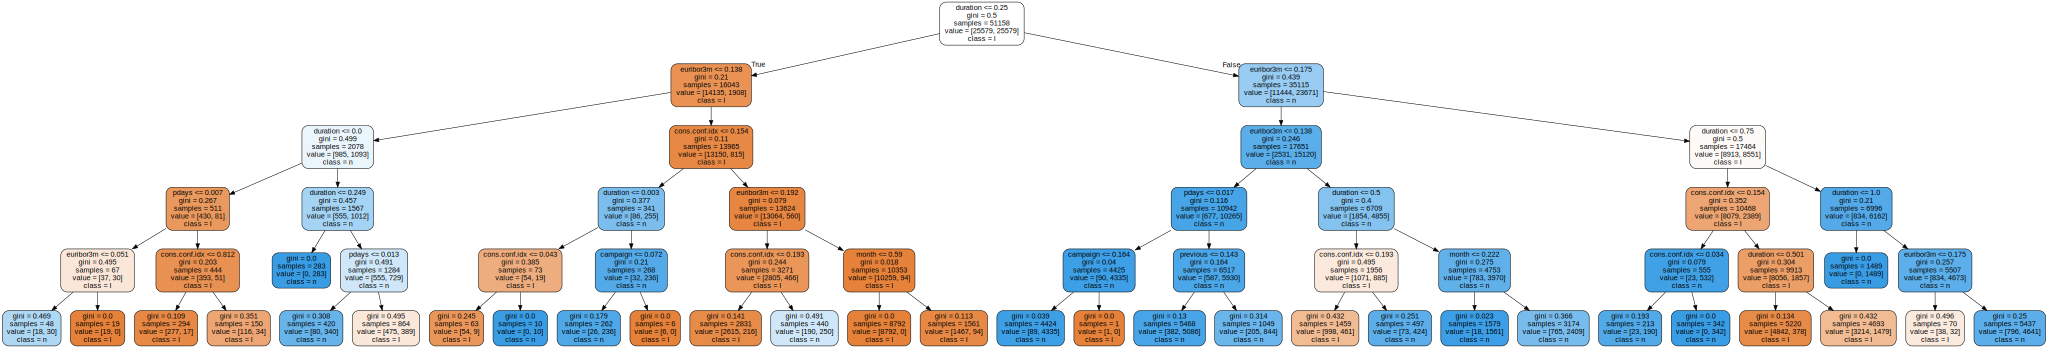

In [98]:
feature_names = X.columns
class_names = str(Y.columns)

dot_data = export_graphviz(clf_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(dot_data)  
graph

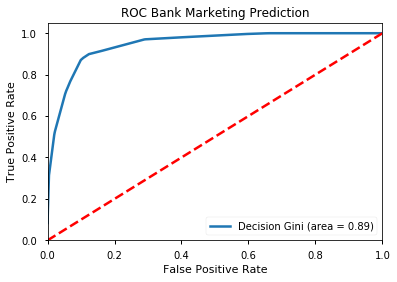

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf_gini.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Gini (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Bank Marketing Prediction')
plt.legend(loc="lower right")
plt.savefig('DecisionGini_ROC')
plt.show()